In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime as datetime

#Binance API
from binance.client import Client

# This API key is limited to read data only ;)
api_key = "ZevsUzyFfmvllzxrCyLxiDHGLQ6FHymqofqVdEpk2pWOP9mCAn2bRmabgZmgJhRM"
api_secret = "PSrimyTIIQ3S7xipyWGtvgMNawkRKT7149ElTt3BogDvkyf4F44sLPi3GQiBgdfD"
client = Client(api_key, api_secret)

#Coinbase API
import cbpro
public_client = cbpro.PublicClient()

from binance.client import Client
client = Client(api_key, api_secret)

In [48]:
# Binance historical data
data_b = client.get_historical_klines("BTCEUR", Client.KLINE_INTERVAL_1MINUTE, "3d")
data_b_array = np.array(data_b)

# Let's stick to time in epochs but dividing by 100000 to make it looking better in the plot
time_b = data_b_array[:,0].astype(np.float)/100000
price_b = data_b_array[:,1].astype(np.float)

In [51]:
# Coinbase historical data 
now = datetime.datetime.now()
end = now - datetime.timedelta(days=0)
start = end - datetime.timedelta(days=3)
data_coinbase = public_client.get_product_historic_rates('BTC-EUR', start, end, granularity=900)
data_coinbase_array = np.array(data_coinbase)

# Factor of 100 was selected in emprical way, it's not 100000 as in the case of Binance.
# Seems like some difference in data formats
time_cb = data_coinbase_array[:,0].astype(np.float)/100
price_cb = data_coinbase_array[:,1].astype(np.float)

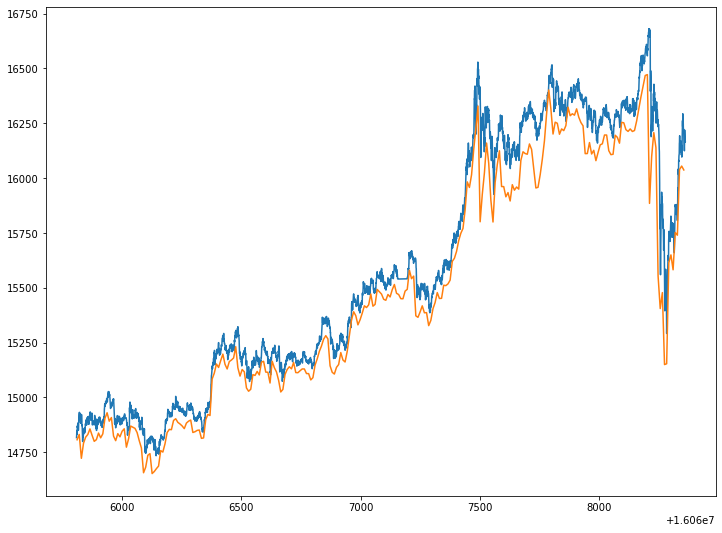

In [52]:
# Comparing prices
plt.figure(figsize=(12,9))
plt.plot(time_b, price_b)
plt.plot(time_cb, price_cb)

In [53]:
# Looking for arbitrage opportunities

N = 10 # number of cycles to update data
df = pd.DataFrame({"Time": ["n/a" for i in range(1,N)],
                    "Price Diff": ["n/a" for i in range(1,N)]
                  })

start_time = time.time()
interval = 1

for i in range(1,N):
    time.sleep(1) #Waiting time of 1 sec between updates
    req = public_client.get_product_order_book('BTC-EUR', level=1)
    req_b = client.get_order_book(symbol='BTCEUR')
    
    # The way we estimate prices is just some approximation!!!
    price_cb = (float(req["bids"][0][0])+float(req["asks"][0][0]))/2
    price_b = (float(req_b['bids'][0][0])+float(req_b['asks'][0][0]))/2
    
    df["Time"].loc[i-1] = "%.0f" %time.time()
    df["Price Diff"].loc[i-1] = round(price_b-price_cb, 2)
    print(int(round(time.time(),0)) + i*interval, round(price_b-price_cb, 2))

1606836514 50.97
1606836517 50.97
1606836519 50.97
1606836521 52.5
1606836524 51.98
1606836526 53.63
1606836528 50.54
1606836531 48.88
1606836533 50.24
